<a href="https://colab.research.google.com/github/limhyeona2000/2020-2-AI/blob/master/code/14W-Fashion-MNIST-with-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 및 정규화

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

In [2]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


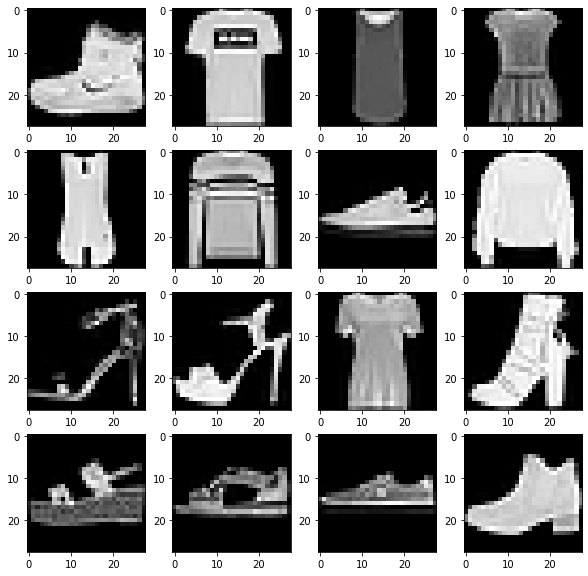

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [3]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width = 10, height = 10으로 지정합니다. 
plt.figure(figsize=(10, 10))
for c in range(16): 
  # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다. 
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터이 1~16번째 까지의 라벨 프린트합니다. 
print(train_Y[:16])

# 딥러닝 모델 생성

### (1) 컨볼루션 신경망 모델 정의

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [5]:
!nvidia-smi

Mon Dec  7 14:57:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    31W / 250W |    425MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### (2) 컨볼루션 신경망 모델 학습

In [6]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4622 - accuracy: 0.8347 - val_loss: 0.3748 - val_accuracy: 0.8631
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3376 - accuracy: 0.8769 - val_loss: 0.3849 - val_accuracy: 0.8586
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2847 - accuracy: 0.8942 - val_loss: 0.3713 - val_accuracy: 0.8719
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2428 - accuracy: 0.9104 - val_loss: 0.4157 - val_accuracy: 0.8668
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2086 - accuracy: 0.9235 - val_loss: 0.4355 - val_accuracy: 0.8685
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1797 - accuracy: 0.9324 - val_loss: 0.4663 - val_accuracy: 0.8654
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1677 - accuracy: 0.9383 - val_loss: 0.5124 - val_accuracy:

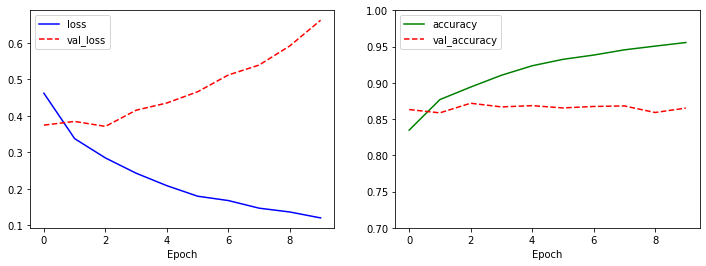

[0.6842100620269775, 0.8614000082015991]

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

### (3) 풀링 레이어, 드롭아웃 레이어 추가 (약 10분)

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [9]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5172 - accuracy: 0.8124 - val_loss: 0.3734 - val_accuracy: 0.8651
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3551 - accuracy: 0.8723 - val_loss: 0.3281 - val_accuracy: 0.8788
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8850 - val_loss: 0.3255 - val_accuracy: 0.8837
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8926 - val_loss: 0.3258 - val_accuracy: 0.8827
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2700 - accuracy: 0.9024 - val_loss: 0.2993 - val_accuracy: 0.8931
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9080 - val_loss: 0.3215 - val_accuracy: 0.8901
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2309 - accuracy: 0.9150 - val_loss: 0.3372 - val_accuracy:

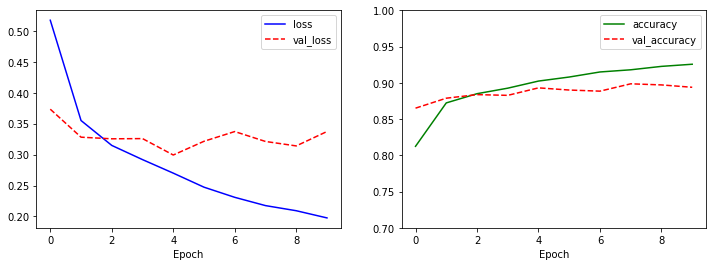

[0.3399488627910614, 0.8971999883651733]

In [10]:
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

# **For example**

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(rate=0.5), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),    
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),  
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [12]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5854 - accuracy: 0.7859 - val_loss: 0.3365 - val_accuracy: 0.8765
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3731 - accuracy: 0.8670 - val_loss: 0.2796 - val_accuracy: 0.8948
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3308 - accuracy: 0.8820 - val_loss: 0.2589 - val_accuracy: 0.9056
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3093 - accuracy: 0.8897 - val_loss: 0.2485 - val_accuracy: 0.9103
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2868 - accuracy: 0.8966 - val_loss: 0.2361 - val_accuracy: 0.9131
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2839 - accuracy: 0.8981 - val_loss: 0.2317 - val_accuracy: 0.9129
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2719 - accuracy: 0.9031 - val_loss: 0.2251 - val_accuracy:

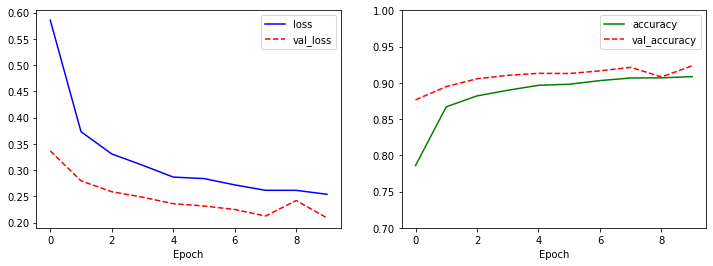

[0.22389648854732513, 0.9172000288963318]

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)